# Deriving Graph Properties Of Contextuality From Linear Programs

Prior to reading, this analysis assumes you are familiar with the following works:
- [1] _Acin, A., Fritz, T., Leverrier, A., and Sainz, A. B. (2015). A combinatorial approach to nonlocality and contextuality. Communications in Mathematical Physics, 334(2):533–628._
- [2] _The thesis of Abdul Karim Obeid, submitted to Queensland University of Technology in 2021_

This iPython Jupyter Notebook serves as an interactive and clarified method through which one can understand the process used to derive the novel graph properties of [2] which characterise contextuality. For this example, I'll be deriving the graph properties for a Bell-CHSH scenario.

To begin (and as is consistent with the combinatorial approach to modelling contextuality [1]), I define the FR product with the `set_fr_product_B222` function, in set form (where each vertex is connoted a numerical value):

In [1]:

from linear_program import *

# Generate the FR product
fr_product = set_fr_product_B222()
fr_product


[[1, 2, 3, 4],
 [5, 6, 7, 8],
 [1, 2, 7, 8],
 [3, 4, 5, 6],
 [2, 4, 9, 11],
 [1, 3, 10, 12],
 [5, 7, 14, 16],
 [6, 8, 13, 15],
 [9, 10, 11, 12],
 [9, 10, 15, 16],
 [11, 12, 13, 14],
 [13, 14, 15, 16]]

The next step involves computing the orthogonality graph of the FR product, with the `orthogonality_graph_B222` function:

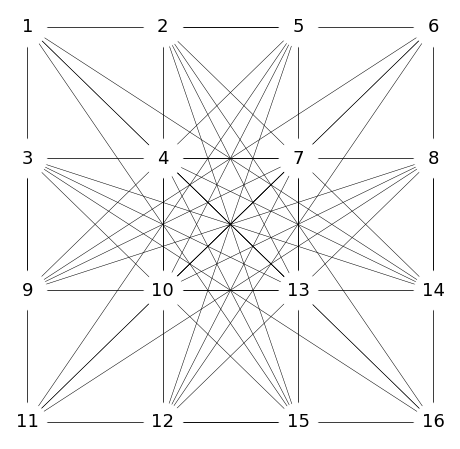

In [2]:

# Generate the orthogonality graph
nonorthogonality_graph = nonorthogonality_graph_B222(fr_product)


Thereafter, the weighted fractional packing number is derived from the non-orthogonality graph via the `nx.algorithms.clique.enumerate_all_cliques` function, and all cliques of length 4 are retrieved for later use.

In [3]:

'''
    Generate the cliques that define the weighted fractional packing number
'''
cliques = [x for x in list(nx.algorithms.clique.enumerate_all_cliques(nonorthogonality_graph))]
cliques_of_length_4 = [x for x in cliques if (len(x) == 4)]
cliques_of_length_4


[[1, 5, 9, 13],
 [1, 5, 11, 15],
 [1, 6, 9, 14],
 [1, 6, 11, 16],
 [2, 5, 10, 13],
 [2, 5, 12, 15],
 [2, 6, 10, 14],
 [2, 6, 12, 16],
 [3, 7, 9, 13],
 [3, 7, 11, 15],
 [3, 8, 9, 14],
 [3, 8, 11, 16],
 [4, 7, 10, 13],
 [4, 7, 12, 15],
 [4, 8, 10, 14],
 [4, 8, 12, 16]]

The weighted fractional packing number can be used to study all deterministic models within the relative probabilistic model, and so its constituent cliques can be studied, through the `linear_program` function. In this particular example, I define a linear program that has a Bell parameter (maximal correlation) of `1.99` (second parameter of function). The linear program is also configured such that the summation of the cliques that define the weighted fractional packing number are equivalent to `1`, as is consistent with [1]:

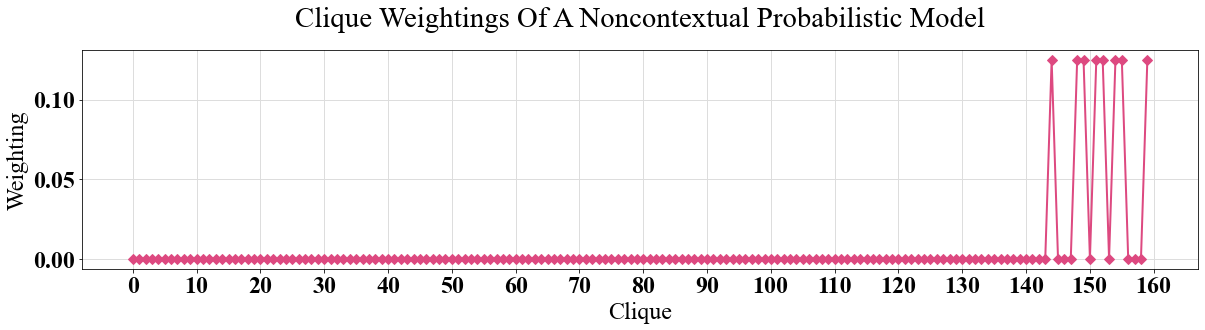

In [5]:

'''
    Define the weightings for the cliques of a linear program of a noncontextual probabilistic model.
'''
p_model_noncontextual = linear_program(1,1.99, cliques)
plot_weightings_of_p_model(p_model_noncontextual,
    "Clique Weightings Of A Noncontextual Probabilistic Model")


Thereafter, I simulate the weightings of the cliques for a contextual probabilistic model. Notice that the summation of the cliques is now increased to `1.01`. This is to allow for a Bell paramter of greater than `2.01` to be recorded, enabling a contextual probabilistic model.

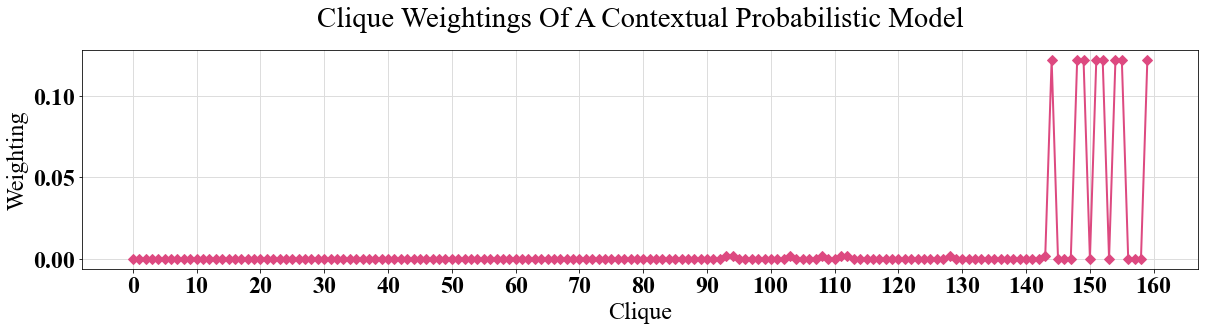

In [4]:

'''
    Define the weightings for the cliques of a linear program of a contextual probabilistic model.
'''
p_model_contextual = linear_program(1.01,2.01, cliques)
plot_weightings_of_p_model(p_model_contextual,
    "Clique Weightings Of A Contextual Probabilistic Model")


At a first glance, there are no immediate differences between both models, however by subtraction of the first set of weightings from the second set of weightings, I notice that the noncontextual model deliberately decreases cliques towards the indices of `>140`, while increasing those which are `<140`:

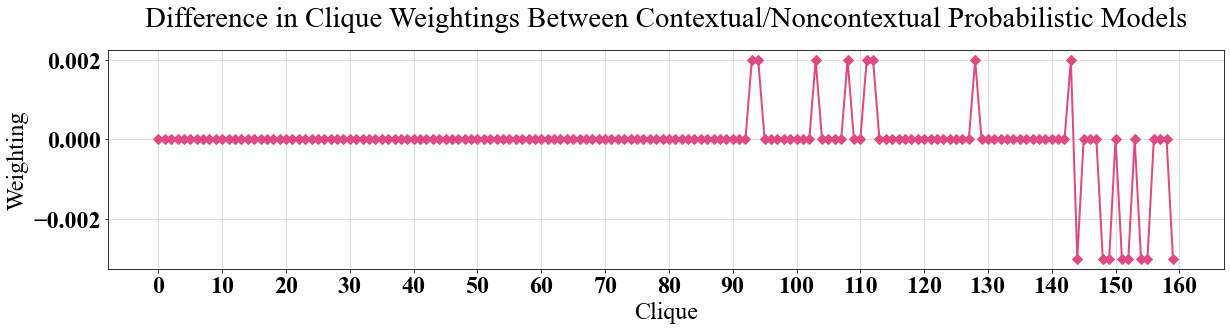

In [5]:
'''
    Define the weightings for the difference of the cliques of both noncontextual and contextual
    probabilistic models.
'''
plot_weightings_of_p_model(p_model_contextual - p_model_noncontextual, 
    "Difference in Clique Weightings Between Contextual/Noncontextual Probabilistic Models")


As latter indices are now of interest, I'll isolate all clique weightings in the contextual probabilistic model that had relevant values:

In [6]:

'''
    Isolate the cliques for which the weightings are characteristic of a contextual probabilistic model 
'''
[cliques[i] for i in range(len(p_model_contextual)) if (p_model_contextual[i] > 0.1)]


[[1, 5, 9, 13],
 [2, 5, 10, 13],
 [2, 5, 12, 15],
 [2, 6, 12, 16],
 [3, 7, 9, 13],
 [3, 8, 9, 14],
 [3, 8, 11, 16],
 [4, 8, 12, 16]]

It can be seen that as a hypergraph, the set of cliques:
* Construct a connected graph.
* Have a single non-adjacent vertex for every clique.
* Intersect all vertices of the original contextuality scenario.

A visualisation of these graph properties is given below:

<div style="
            background-image: url(graph_properties.png);
            float:left;
            width: 100%;
            height: 300px;
            background-position:left center;
            background-repeat: no-repeat;
            background-size: contain;
            margin-bottom: 10px;"></div>


Furthermore, one can adust the linear program to find that other variations of contextual systems also produce other unique combinations of cliques that satisfy the forementioned graph properties. In fact, consider all possible combinations of cliques of length 4 for the weighted fractional packing number of a Bell-CHSH scenario. One can evaluate all 65,536 combinations, and isolate only the combinations of cliques that satisfy the forementioned graph properties. What is found is that all valid combinations denote characterisations of extremal probabilistic models of the Bell-CHSH scenario:

In [7]:

'''
    Evaluate the graph properties that are conjectured to define the cliques that characterise
    all extremal probabilistic models (i.e., maximally contextual probabilistic models) of a system of 
    contextuality scenarios.
'''
evaluate_graph_properties(cliques_of_length_4)


Tested a total of 65536 combinations:

	Found a combination of cliques (set form):
	[[1, 6, 11, 16], [2, 5, 10, 13], [2, 6, 10, 14], [2, 6, 12, 16], [3, 7, 9, 13], [3, 7, 11, 15], [3, 8, 11, 16], [4, 7, 10, 13]]

	Found a combination of cliques (set form):
	[[1, 6, 9, 14], [2, 5, 12, 15], [2, 6, 10, 14], [2, 6, 12, 16], [3, 7, 9, 13], [3, 7, 11, 15], [3, 8, 9, 14], [4, 7, 12, 15]]

	Found a combination of cliques (set form):
	[[1, 5, 11, 15], [2, 5, 10, 13], [2, 5, 12, 15], [2, 6, 10, 14], [3, 7, 11, 15], [3, 8, 9, 14], [3, 8, 11, 16], [4, 8, 10, 14]]

	Found a combination of cliques (set form):
	[[1, 5, 11, 15], [1, 6, 9, 14], [1, 6, 11, 16], [2, 6, 10, 14], [3, 7, 11, 15], [4, 7, 10, 13], [4, 7, 12, 15], [4, 8, 10, 14]]

	Found a combination of cliques (set form):
	[[1, 5, 9, 13], [2, 5, 10, 13], [2, 5, 12, 15], [2, 6, 12, 16], [3, 7, 9, 13], [3, 8, 9, 14], [3, 8, 11, 16], [4, 8, 12, 16]]

	Found a combination of cliques (set form):
	[[1, 5, 9, 13], [1, 6, 9, 14], [1, 6, 11, 16], [2,

All given combinations of the forementioned function are visualised as follows:

<div style="
            background-image: url(extremal_models.png);
            float:left;
            width: 100%;
            height: 600px;
            background-position:left center;
            background-repeat: no-repeat;
            background-size: contain;
            margin-bottom: 10px;
            margin-top: 10px;"></div>

## Citation

This analysis was produced by Abdul Karim Obeid in the year 2020. If you would like to cite this numerical analysis with a BibTex citation, you may do so as follows:

```
@misc{akobeidLinearProgram2020,
  author = {Abdul Karim Obeid},
  title = {Deriving Graph Properties Of Contextuality From Linear Programs},
  year = {2020},
  publisher = {GitHub},
  journal = {GitHub repository},
  howpublished = {\url{}},
  commit = {}
}
```